## Exploratory data analysis
The objective of this project is to perform an in-depth exploratory data analysis (EDA) on the provided dataset in order to better understand the structure, relationships, and quality of the data. This includes identifying patterns, trends, and potential anomalies within key variables. 

The ultimate goal is to clean and prepare the dataset for modeling and to develop meaningful visualizations that effectively communicate initial insights and support further analysis.

In [1]:
# Imports, links, and loading data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns 

df = pd.read_csv('data/2017_Yellow_Taxi_Trip_Data.csv')
print("Data loaded successfully")

Data loaded successfully


In [2]:
df.size

408582

In [3]:
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [5]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


## Data visualization
Perform a check for outliers on relevant columns such as trip distance and trip duration. Some of the best ways to identify the presence of outliers in data are `box plots` and `histograms`.

In [6]:
# Convert data columns to datetime
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])

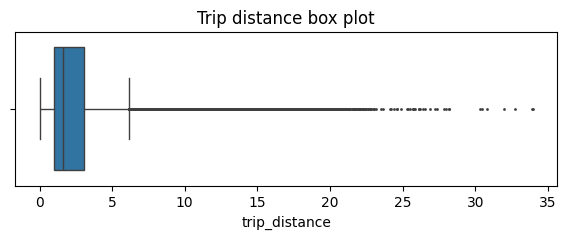

In [7]:
# Create box plot of trip_distance
plt.figure(figsize=(7,2))
plt.title('Trip distance box plot')
sns.boxplot(data=None, x=df['trip_distance'], fliersize=1);

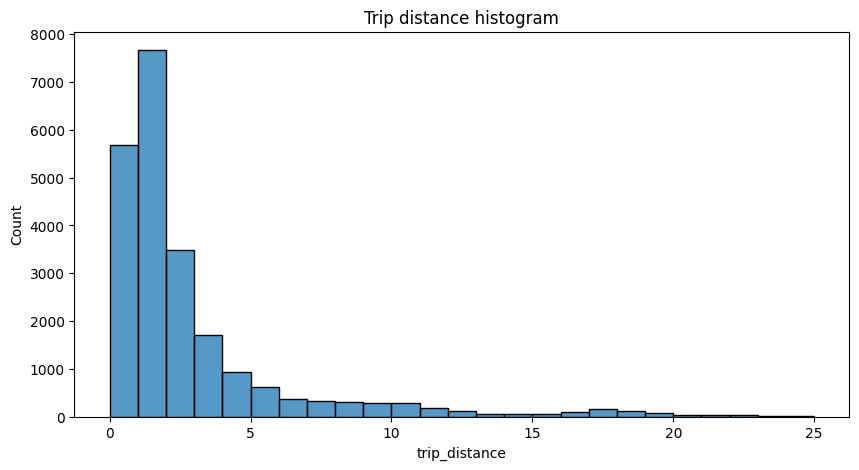

In [8]:
# Create histogram of trip_distance
plt.figure(figsize=(10,5))
sns.histplot(df['trip_distance'], bins=range(0,26,1))
plt.title('Trip distance histogram');

The majority of trips were journeys of less than two miles. The number of trips falls away steeply as the distance traveled increases beyond two miles.

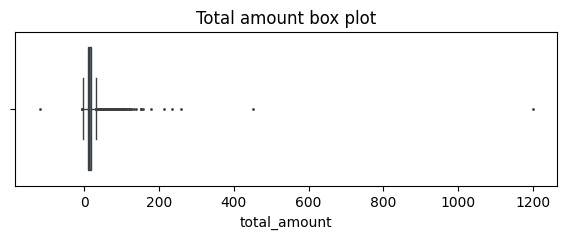

In [9]:
# Create box plot of total_amount
plt.figure(figsize=(7,2))
plt.title('Total amount box plot')
sns.boxplot(x=df['total_amount'], fliersize=1);

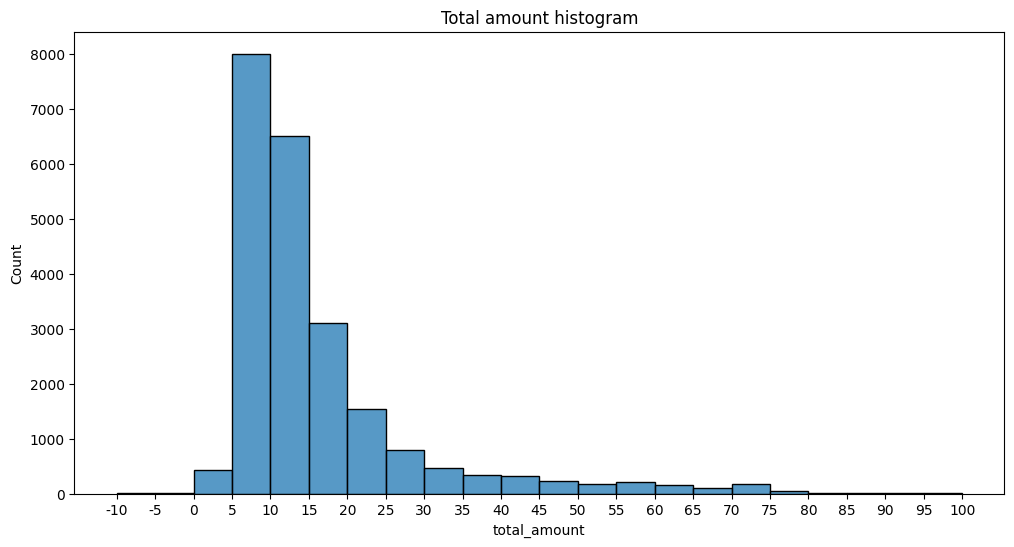

In [10]:
# Create histogram of total_amount
plt.figure(figsize=(12,6))
ax = sns.histplot(df['total_amount'], bins=range(-10,101,5))
ax.set_xticks(range(-10,101,5))
ax.set_xticklabels(range(-10,101,5))

plt.title('Total amount histogram');

The total cost of each trip also has a distribution that skews right, with most costs falling in the $5-15 range.

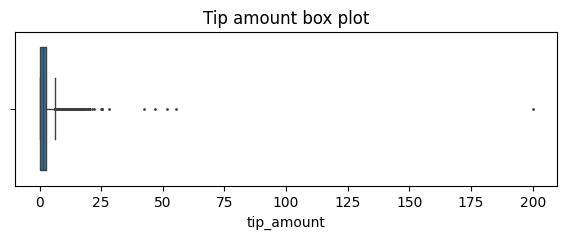

In [11]:
# Create box plot of tip_amount
plt.figure(figsize=(7,2))
plt.title('Tip amount box plot')
sns.boxplot(x=df['tip_amount'], fliersize=1);

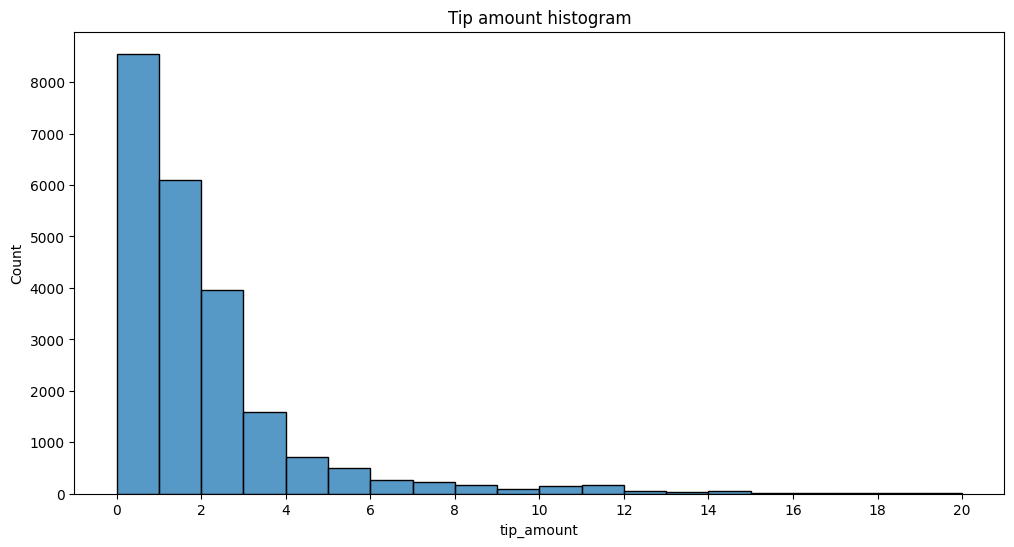

In [12]:
# Create histogram of tip_amount
plt.figure(figsize=(12,6))
ax = sns.histplot(df['tip_amount'], bins=range(0,21,1))
ax.set_xticks(range(0,21,2))
ax.set_xticklabels(range(0,21,2))

plt.title('Tip amount histogram');

The distribution for tip amount is right-skewed, with nearly all the tips in the $0-3 range.

Text(0.5, 0, 'Tip Amount')

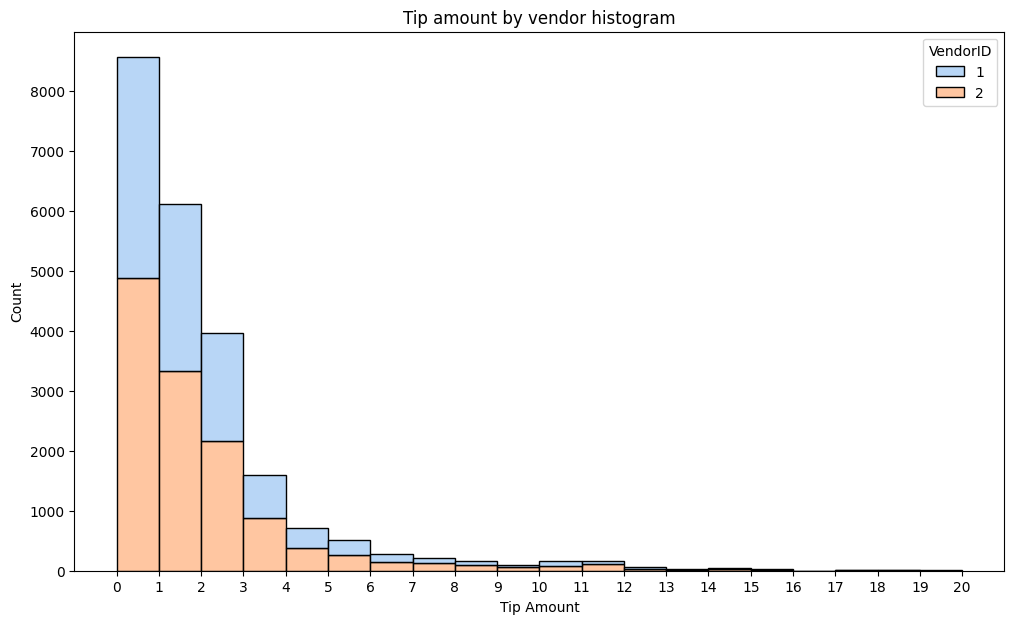

In [13]:
# Create histogram of tip_amount by vendor
plt.figure(figsize=(12,7))
ax = sns.histplot(data=df, x='tip_amount', bins=range(0,21,1), 
                  hue='VendorID', 
                  multiple='stack',
                  palette='pastel')
ax.set_xticks(range(0,21,1))
ax.set_xticklabels(range(0,21,1))

plt.title('Tip amount by vendor histogram');
plt.ylabel('Count')
plt.xlabel('Tip Amount')

Separating the tip amount by vendor reveals that there are no noticeable aberrations in the distribution of tips between the two vendors in the dataset. Vendor two has a slightly higher share of the rides, and this proportion is approximately maintained for all tip amounts.

Next, zoom in on the upper end of the range of tips to check whether vendor one gets noticeably more of the most generous tips.

Text(0.5, 0, 'Tip Amount')

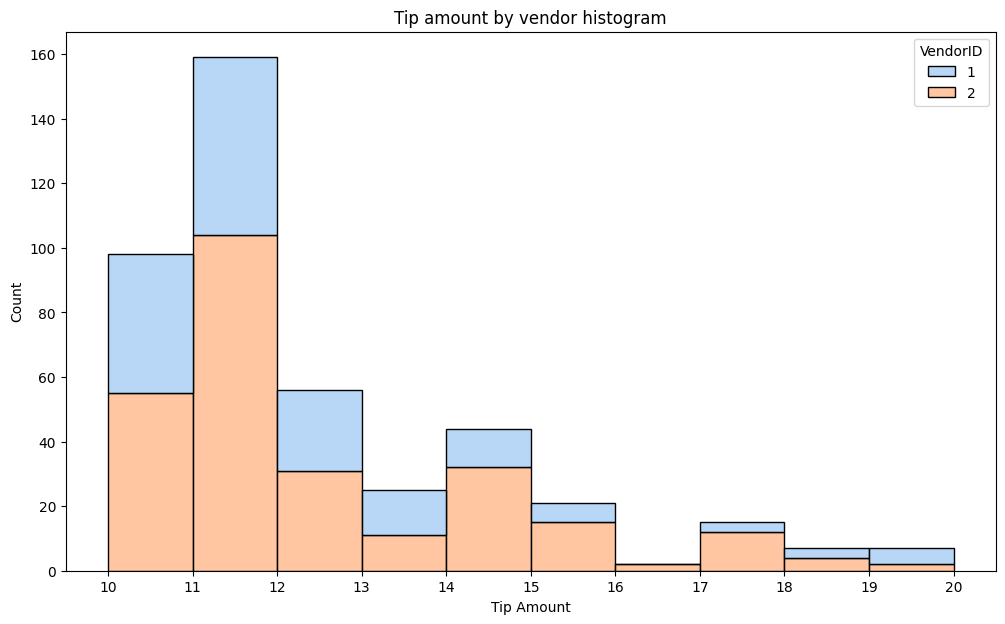

In [14]:
# Create histogram of tip_amount by vendor for tips > $10 
tips_over_ten = df[df['tip_amount'] > 10]

plt.figure(figsize=(12,7))
ax = sns.histplot(data=tips_over_ten, 
                  x='tip_amount', 
                  bins=range(10,21,1), 
                  hue='VendorID', 
                  multiple='stack',
                  palette='pastel')
ax.set_xticks(range(10,21,1))
ax.set_xticklabels(range(10,21,1))

plt.title('Tip amount by vendor histogram');
plt.ylabel('Count')
plt.xlabel('Tip Amount')

The proportions are maintained even at these higher tip amounts, with the exception being at highest extremity, but this is not noteworthy due to the low sample size at these tip amounts.

### Mean tips by passenger count

Examine the unique values in the `passenger_count` column.

In [15]:
df['passenger_count'].value_counts()

passenger_count
1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: count, dtype: int64

Nearly two thirds of the rides were single occupancy, though there were still nearly 700 rides with as many as six passengers. Also, there are 33 rides with an occupancy count of zero, which doesn't make sense. These would likely be dropped unless a reasonable explanation can be found for them.

In [16]:
# Calculate mean tips by passenger_count
mean_tips_by_passenger_count = df.groupby(['passenger_count']).mean(numeric_only=True)[['tip_amount']]
mean_tips_by_passenger_count

,tip_amount
passenger_count,
0,2.135758
1,1.848920
2,1.856378
3,1.716768
4,1.530264
5,1.873185
6,1.720260


Text(0.5, 0, 'Passenger count')

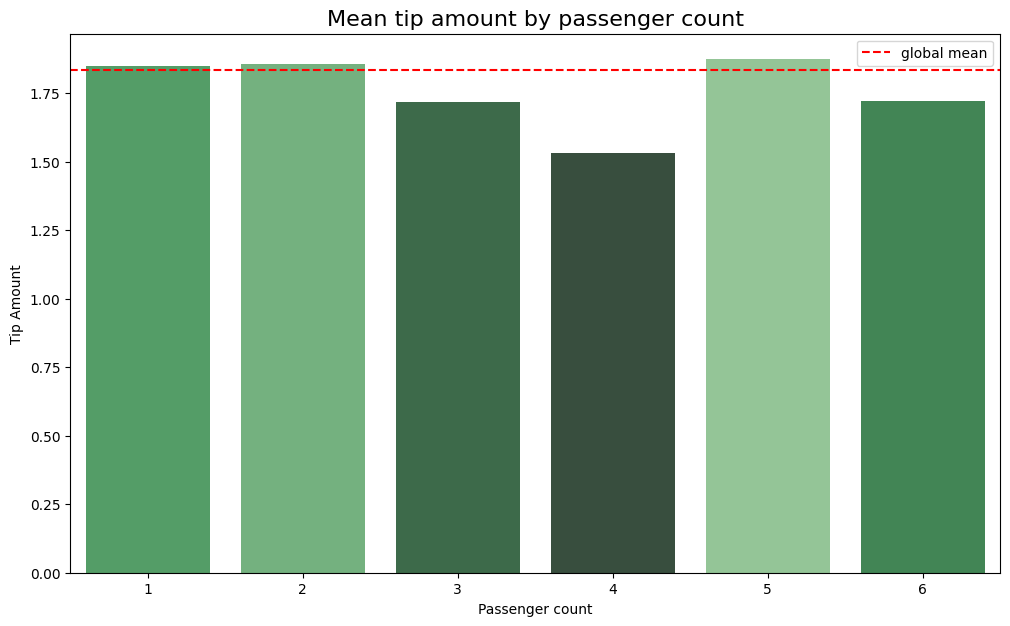

In [17]:
# Create bar plot for mean tips by passenger count
data = mean_tips_by_passenger_count.tail(-1)

pal = sns.color_palette("Greens_d", len(data))
rank = data['tip_amount'].argsort().argsort()

plt.figure(figsize=(12,7))
ax = sns.barplot(x=data.index, 
                 y=data['tip_amount'], 
                 hue=data.index, 
                 legend=False, 
                 palette=np.array(pal[::-1])[rank].tolist())
ax.axhline(df['tip_amount'].mean(), ls='--', color='red', label='global mean')
ax.legend()

plt.title('Mean tip amount by passenger count', fontsize=16);
plt.ylabel('Tip Amount')
plt.xlabel('Passenger count')

Mean tip amount varies very little by passenger count. Although it does drop noticeably for four-passenger rides, it's expected that there would be a higher degree of fluctuation because rides with four passengers were the least plentiful in the dataset (aside from rides with zero passengers).

### Create month and day columns

In [18]:
# Create a month column
df['month'] = df['tpep_pickup_datetime'].dt.month_name()
# Create a day column
df['day'] = df['tpep_pickup_datetime'].dt.day_name()

In [19]:
# Get total number of rides for each month
monthly_rides = df['month'].value_counts()
monthly_rides

month
March        2049
October      2027
April        2019
May          2013
January      1997
June         1964
December     1863
November     1843
February     1769
September    1734
August       1724
July         1697
Name: count, dtype: int64

In [20]:
# Reorder the monthly ride list so months go in order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']

monthly_rides = monthly_rides.reindex(index=month_order)
monthly_rides

month
January      1997
February     1769
March        2049
April        2019
May          2013
June         1964
July         1697
August       1724
September    1734
October      2027
November     1843
December     1863
Name: count, dtype: int64

In [21]:
# Show the index
monthly_rides.index

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object', name='month')

Text(0.5, 0, 'Month')

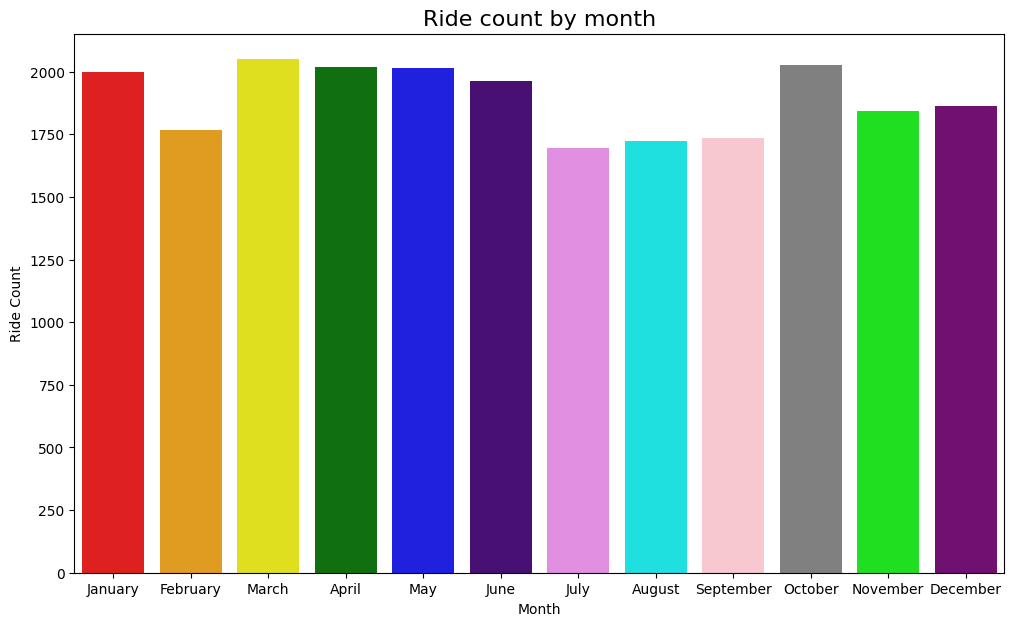

In [22]:
# Create a bar plot of total rides per month
color_palette = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet', 'cyan', 'pink', 'gray', 'lime', 'purple']

plt.figure(figsize=(12,7))
ax = sns.barplot(x=monthly_rides.index, 
                 y=monthly_rides,
                 hue=monthly_rides.index,
                 legend=False,
                 palette=color_palette)

ax.set_xticks(range(len(month_order)))
ax.set_xticklabels(month_order)

plt.title('Ride count by month', fontsize=16);
plt.ylabel('Ride Count')
plt.xlabel('Month')

Monthly rides are fairly consistent, with notable dips in the summer months of July, August, and September, and also in February.

In [23]:
# Repeat the above process, this time for rides by day
daily_rides = df['day'].value_counts()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_rides = daily_rides.reindex(index=day_order)
daily_rides

day
Monday       2931
Tuesday      3198
Wednesday    3390
Thursday     3402
Friday       3413
Saturday     3367
Sunday       2998
Name: count, dtype: int64

Text(0.5, 0, 'Day')

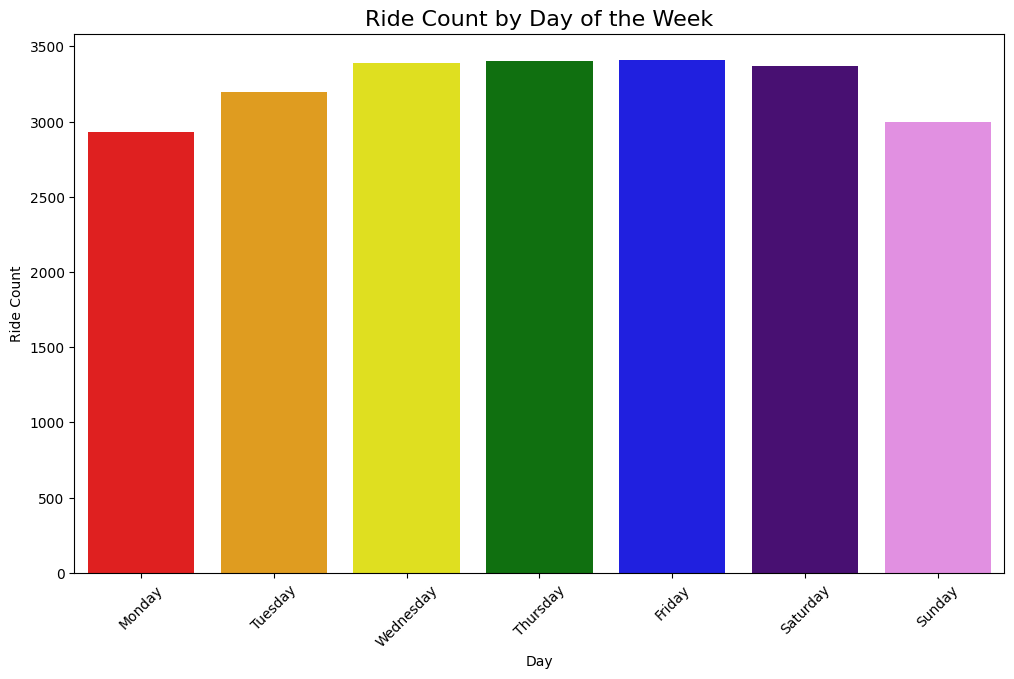

In [24]:
# Create bar plot for ride count by day
color_palette = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet']

plt.figure(figsize=(12,7))
ax = sns.barplot(x=daily_rides.index,
                 y=daily_rides, 
                 hue=daily_rides.index,
                 legend=False,
                 palette=color_palette)

ax.set_xticks(range(len(day_order)))
ax.set_xticklabels(day_order, rotation=45)

plt.title('Ride Count by Day of the Week', fontsize=16)
plt.ylabel('Ride Count')
plt.xlabel('Day')

Suprisingly, Wednesday through Saturday had the highest number of daily rides, while Sunday and Monday had the least.

### Plot total revenue by month

In [25]:
# Repeat the process, this time for total revenue by month
total_amount_month = df.groupby('month').sum(numeric_only=True)[['total_amount']]
total_amount_month = total_amount_month.reindex(index=month_order)
total_amount_month

,total_amount
month,
January,31735.25
February,28937.89
March,33085.89
April,32012.54
May,33828.58
June,32920.52
July,26617.64
August,27759.56
September,28206.38


Text(0.5, 0, 'Month')

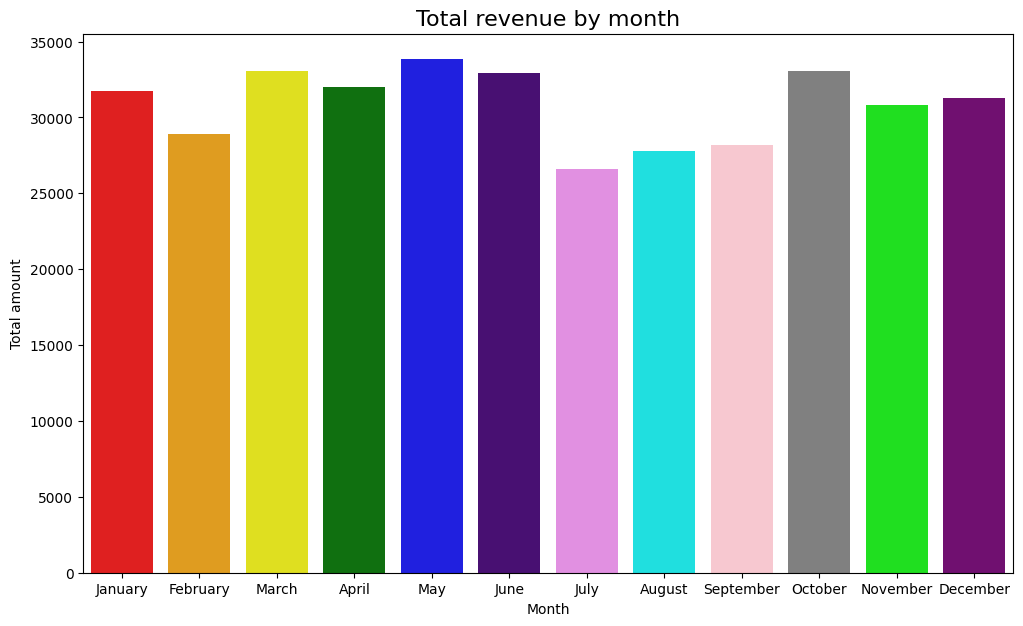

In [26]:
# Create a bar plot of total revenue by month
color_palette = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet', 'cyan', 'pink', 'gray', 'lime', 'purple']

plt.figure(figsize=(12,7))
ax = sns.barplot(x=total_amount_month.index, 
                 y=total_amount_month['total_amount'],                 
                 hue=total_amount_month.index,
                 legend=False,
                 palette=color_palette
                )
plt.title('Total revenue by month', fontsize=16);
plt.ylabel('Total amount')
plt.xlabel('Month')

Monthly revenue generally follows the pattern of monthly rides, with noticeable dips in the summer months of July, August, and September, and also one in February.

[Tableau visualization]

### Plot mean trip distance by drop-off location

In [27]:
# Get number of unique drop-off location IDs
df['DOLocationID'].nunique()

216

In [28]:
# Calculate the mean trip distance for each drop-off location
distance_by_dropoff = df.groupby('DOLocationID').mean(numeric_only=True)[['trip_distance']]

# Sort the results in descending order by mean trip distance
distance_by_dropoff = distance_by_dropoff.sort_values(by='trip_distance')
distance_by_dropoff 

,trip_distance
DOLocationID,
207,1.200000
193,1.390556
237,1.555494
234,1.727806
137,1.818852
...,...
51,17.310000
11,17.945000
210,20.500000


Text(0, 0.5, 'Trip distance')

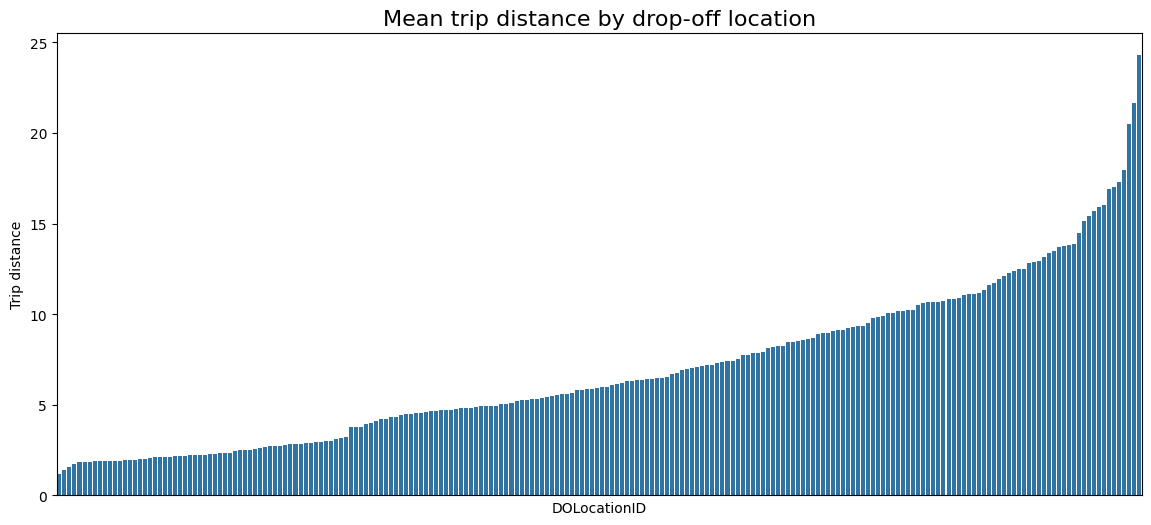

In [29]:
# Create a bar plot of mean trip distances by drop-off location in ascending order by distance
plt.figure(figsize=(14,6))
ax = sns.barplot(x=distance_by_dropoff.index, 
                 y=distance_by_dropoff['trip_distance'],
                 order=distance_by_dropoff.index)
ax.set_xticklabels([])
ax.set_xticks([])

plt.title('Mean trip distance by drop-off location', fontsize=16);
plt.ylabel('Trip distance')

This plot presents a characteristic curve related to the cumulative density function of a normal distribution. In other words, it indicates that the drop-off points are relatively evenly distributed over the terrain. This is good to know, because geographic coordinates were not included in this dataset, so there was no obvious way to test for the distibution of locations.

To confirm this conclusion, consider the following experiment:

Create a sample of coordinates from a normal distribution—in this case 1,500 pairs of points from a normal distribution with a mean of 10 and a standard deviation of 5
Calculate the distance between each pair of coordinates
Group the coordinates by endpoint and calculate the mean distance between that endpoint and all other points it was paired with
Plot the mean distance for each unique endpoint

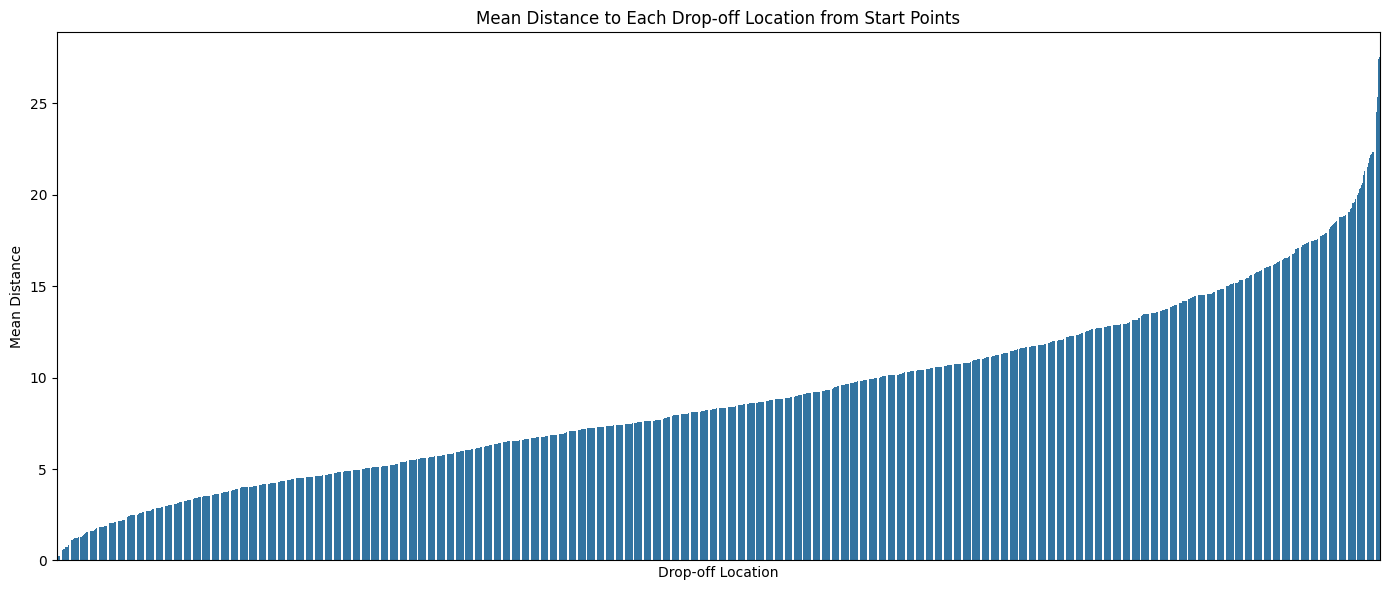

In [30]:
# 1. Generate random 2D points from a normal distribution
np.random.seed(42)  # For reproducibility
points = np.round(np.random.normal(loc=10, scale=5, size=(3000, 2)), 1)

# Split into start (pick-up) and end (drop-off) locations
midway = len(points) // 2
start_points = points[:midway]
end_points = points[midway:]

# 2. Calculate Euclidean distances
distances = np.linalg.norm(start_points - end_points, axis=1)

# 3. Create DataFrame and compute mean distance by drop-off location
test_df = pd.DataFrame({
    'start': [tuple(pt) for pt in start_points],
    'end': [tuple(pt) for pt in end_points],
    'distance': distances
})

# Group by drop-off location and calculate mean distances
grouped_data = test_df.groupby('end')['distance'].mean().sort_values()

# Convert index (tuples) to strings for plotting
grouped_data.index = grouped_data.index.map(str)

# 4. Plot
plt.figure(figsize=(14, 6))
ax = sns.barplot(x=grouped_data.index, y=grouped_data.values)

# Clean up x-axis (optional: hide labels if too many)
ax.set_xticklabels([])
ax.set_xticks([])

# Labels and title
ax.set_xlabel('Drop-off Location')
ax.set_ylabel('Mean Distance')
ax.set_title('Mean Distance to Each Drop-off Location from Start Points')

plt.tight_layout()
plt.show()

In [31]:
print(df.columns)

Index(['Unnamed: 0', 'VendorID', 'tpep_pickup_datetime',
       'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
       'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount', 'month',
       'day'],
      dtype='object')


The curve described by this graph is nearly identical to that of the mean distance traveled by each taxi ride to each drop-off location. This reveals that the drop-off locations in the taxi dataset are evenly distributed geographically. Note, however, that this does not mean that there was an even distrubtion of rides to each drop-off point. Examine this next.

### Histogram of rides by drop-off location

In [34]:
# Check if all drop-off locations are consecutively numbered
int(df['DOLocationID'].max() - len(set(df['DOLocationID'])))

49

There are 49 numbers that do not represent a drop-off location.
To eliminate the spaces in the historgram that these missing numbers would create, sort the unique drop-off location values, then convert them to strings. This will make the histplot function display all bars directly next to each other.

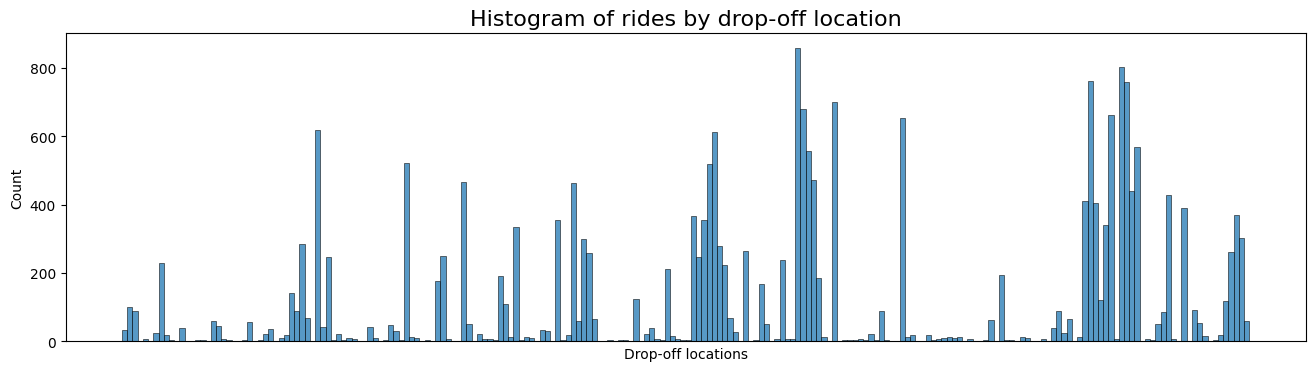

In [36]:
plt.figure(figsize=(16,4))

# DOLocationID column is numeric, so sort in ascending order
sorted_dropoffs = df['DOLocationID'].sort_values()

# Convert to string
sorted_dropoffs = sorted_dropoffs.astype('str')

# Plot
sns.histplot(sorted_dropoffs, bins=range(0, df['DOLocationID'].max()+1, 1))

plt.xticks([])
plt.xlabel('Drop-off locations')
plt.title('Histogram of rides by drop-off location', fontsize=16);

Notice that out of the 200+ drop-off locations, a disproportionate number of locations receive the majority of the traffic, while all the rest get relatively few trips. It's likely that these high-traffic locations are near popular tourist attractions like the Empire State Building or Times Square, airports, and train and bus terminals. However, it would be helpful to know the location that each ID corresponds with. Unfortunately, this is not in the data.

## Results and evaluation

The highest distribution of trip distances are below 5 miles, but there are outliers all the way out to 35 miles. There are no missing values.

There are several trips that have a trip distance of "0.0." What might those trips be? Will they impact our model?

Data includes dropoff and pickup times. We can use that information to derive a trip duration for each line of data.

In [37]:
df['trip_duration'] = (df['tpep_dropoff_datetime']-df['tpep_pickup_datetime'])

In [38]:
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,trip_duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,13.0,0.0,0.5,2.76,0.0,0.3,16.56,March,Saturday,0 days 00:14:04
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,16.0,0.0,0.5,4.00,0.0,0.3,20.80,April,Tuesday,0 days 00:26:30
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,6.5,0.0,0.5,1.45,0.0,0.3,8.75,December,Friday,0 days 00:07:12
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,20.5,0.0,0.5,6.39,0.0,0.3,27.69,May,Sunday,0 days 00:30:15
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,16.5,0.5,0.5,0.00,0.0,0.3,17.80,April,Saturday,0 days 00:16:43
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,...,9.0,0.5,0.5,2.06,0.0,0.3,12.36,March,Saturday,0 days 00:08:00
6,37660487,2,2017-05-03 19:04:09,2017-05-03 20:03:47,1,12.83,1,N,79,241,...,47.5,1.0,0.5,9.86,0.0,0.3,59.16,May,Wednesday,0 days 00:59:38
7,69059411,2,2017-08-15 17:41:06,2017-08-15 18:03:05,1,2.98,1,N,237,114,...,16.0,1.0,0.5,1.78,0.0,0.3,19.58,August,Tuesday,0 days 00:21:59
8,8433159,2,2017-02-04 16:17:07,2017-02-04 16:29:14,1,1.20,1,N,234,249,...,9.0,0.0,0.5,0.00,0.0,0.3,9.80,February,Saturday,0 days 00:12:07
9,95294817,1,2017-11-10 15:20:29,2017-11-10 15:40:55,1,1.60,1,N,239,237,...,13.0,0.0,0.5,2.75,0.0,0.3,16.55,November,Friday,0 days 00:20:26


### Conclusion
That this dataset has some outliers that we will need to make decisions on prior to designing a model.